In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

Data Analysis

In [68]:
# Load Dataset
file_path = "C:\\Users\\acer\\Downloads\\Customer segmentation\\Customer segmentation\\marketing_campaign1.xlsx"
df = pd.read_excel(file_path)

In [69]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [72]:
#checking for missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [74]:
# checking for duplicates
df.duplicated().any()

False

In [76]:
# separate the numerical features and categorical features

#numerical columns
num_col=df.select_dtypes(include=['float','int'])
num_col

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [78]:
#categorical column
cat_col=df.select_dtypes(include='O')
cat_col

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [80]:
# Get summary statistics of numerical columns
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                  ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.0000

Data Cleaning

In [86]:
# Step 1: Remove unrealistic birth years (Keep customers born after 1920)
df = df[df['Year_Birth'] > 1920].copy()

In [88]:
# Step 2: Fix invalid Marital_Status values
valid_statuses = ['Single', 'Married', 'Together', 'Divorced', 'Widow']
df.loc[:, 'Marital_Status'] = df['Marital_Status'].apply(lambda x: x if x in valid_statuses else 'Single')

In [90]:
# Step 3: Fill missing Income values with the median
df.loc[:, 'Income'] = df['Income'].fillna(df['Income'].median())

In [92]:
# Step 4: Remove extreme Income outliers (Remove customers earning > 300K)
df = df[df['Income'] < 300000].copy()

Feature Engineering

In [95]:
# Step 5: Create new features
df['Age'] = 2025 - df['Year_Birth']  # Calculate Age
df['TotalSpend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)  # Total spending
df['FamilySize'] = df['Kidhome'] + df['Teenhome'] + 1  # Family size

In [97]:
# Step 6: Convert 'Dt_Customer' to datetime format and calculate Years with Company
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['YearsWithCompany'] = 2024 - df['Dt_Customer'].dt.year

In [99]:
# Step 7: Create a separate dataset for feature engineering (exclude ID)
df_features = df.drop(columns=['ID','Z_CostContact','Z_Revenue'])

In [101]:
# Display dataset after cleaning
print("\nDataset after Cleaning and Feature Engineering:\n", df_features.head())


Dataset after Cleaning and Feature Engineering:
    Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635         88  ...             0             0   
1  2014-03-08       38        11          1  ...             0             0   
2  2013-08-21       26       426         49  ...             0             0   
3  2014-02-10       26        11          4  ...             0             0   
4  2014-01-19       94       173         43  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Compl

Data Visualization

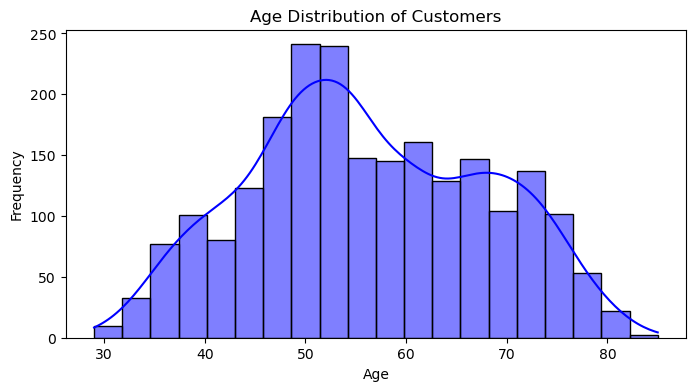

In [105]:
#histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


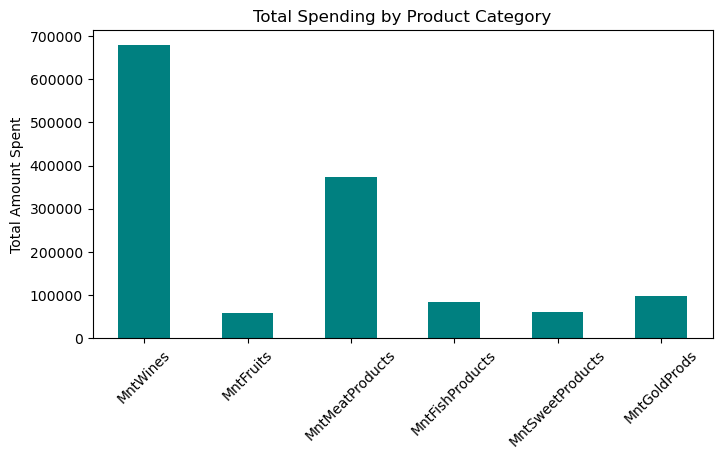

In [107]:
#bar chart
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spend_cols].sum().plot(kind='bar', color='teal', figsize=(8,4))
plt.title("Total Spending by Product Category")
plt.ylabel("Total Amount Spent")
plt.xticks(rotation=45)
plt.show()

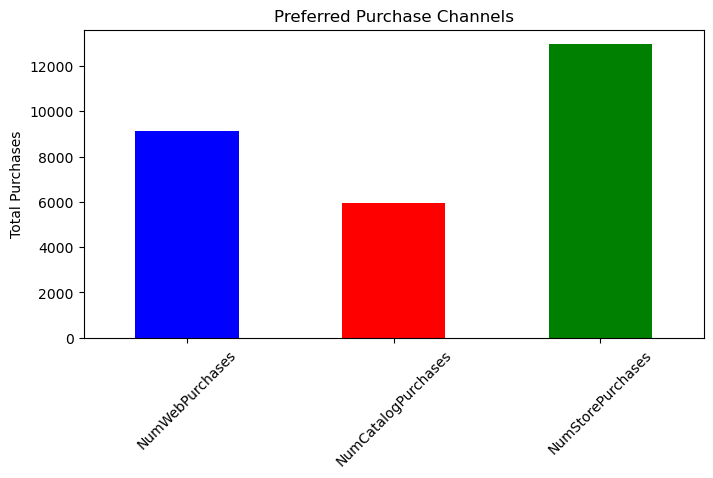

In [109]:
#bar chart
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df[channels].sum().plot(kind='bar', color=['blue', 'red', 'green'], figsize=(8,4))
plt.title("Preferred Purchase Channels")
plt.ylabel("Total Purchases")
plt.xticks(rotation=45)
plt.show()


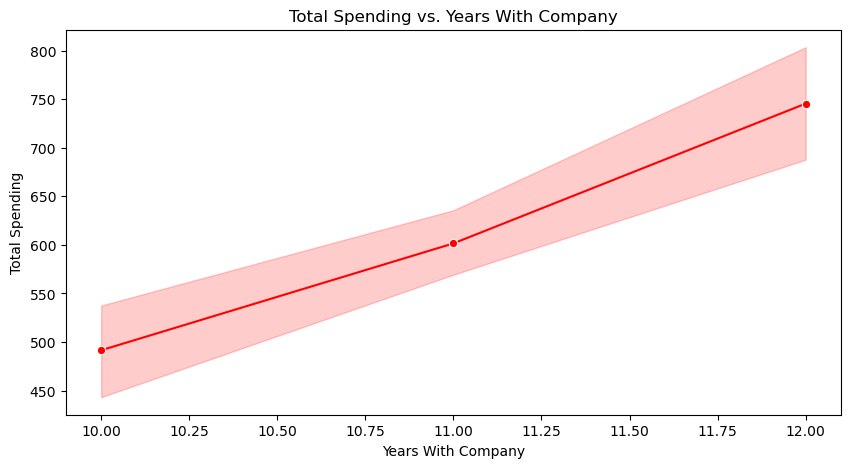

In [111]:
#line chart
plt.figure(figsize=(10, 5))
sns.lineplot(x='YearsWithCompany', y='TotalSpend', data=df, marker='o', color='red')
plt.title("Total Spending vs. Years With Company")
plt.xlabel("Years With Company")
plt.ylabel("Total Spending")
plt.show()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpend,FamilySize,YearsWithCompany
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,68,1617,1,12
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,71,27,3,10
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,60,776,1,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,41,53,2,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,44,422,2,10


<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2236 non-null   int64         
 1   Year_Birth           2236 non-null   int64         
 2   Education            2236 non-null   object        
 3   Marital_Status       2236 non-null   object        
 4   Income               2236 non-null   float64       
 5   Kidhome              2236 non-null   int64         
 6   Teenhome             2236 non-null   int64         
 7   Dt_Customer          2236 non-null   datetime64[ns]
 8   Recency              2236 non-null   int64         
 9   MntWines             2236 non-null   int64         
 10  MntFruits            2236 non-null   int64         
 11  MntMeatProducts      2236 non-null   int64         
 12  MntFishProducts      2236 non-null   int64         
 13  MntSweetProducts     2236 non-null   i

None

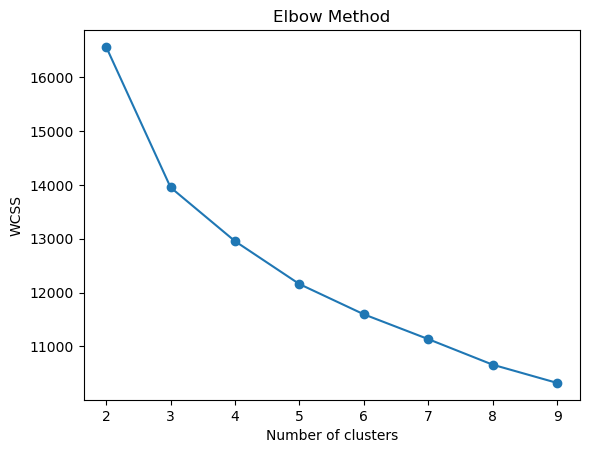

Silhouette Score: 0.30562923177395046


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,TotalSpend,FamilySize,YearsWithCompany
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5616.380671,1971.140039,2.277120,1.727811,34831.998028,0.757396,0.462525,2013-08-15 19:25:55.029585920,49.280079,39.921105,...,0.000986,0.001972,0.010848,3.0,11.0,0.084813,53.859961,92.661736,2.219921,10.857988
1,5707.736462,1969.844765,2.115523,1.768953,75628.050542,0.032491,0.241877,2013-06-28 11:00:12.996389888,48.559567,539.148014,...,0.198556,0.010830,0.003610,3.0,11.0,0.252708,55.155235,1431.823105,1.274368,11.007220
2,5419.044304,1965.877637,2.609705,1.698312,53791.660338,0.383966,0.875527,2013-04-25 00:33:25.063290880,48.194093,419.736287,...,0.033755,0.021097,0.006329,3.0,11.0,0.162447,59.122363,647.932489,2.259494,11.219409
3,5631.301486,1966.554140,2.598726,1.764331,73036.046709,0.072187,0.386412,2013-07-15 01:53:07.261146624,50.019108,618.365180,...,0.152866,0.031847,0.010616,3.0,11.0,0.214437,58.445860,1183.210191,1.458599,10.949045


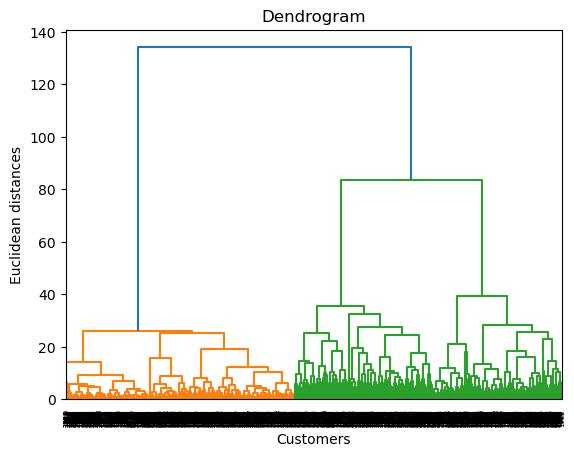

In [119]:
# Display basic information
display(df.head())
display(df.info())

df.dropna(inplace=True)  # Removing missing values

# Encoding categorical features
le = LabelEncoder()
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Feature selection
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Scaling the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])
# Finding optimal clusters using Elbow method
wcss = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# K-Means Clustering
optimal_k = 4  # Based on elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Silhouette Score
total_silhouette = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {total_silhouette}')

# Cluster Profiling
cluster_summary = df.groupby('Cluster').mean()
display(cluster_summary)

# Hierarchical Clustering
dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_15024\789090032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_sums.index, y=campaign_sums.values, palette="coolwarm") # Now sns is defined and can be used


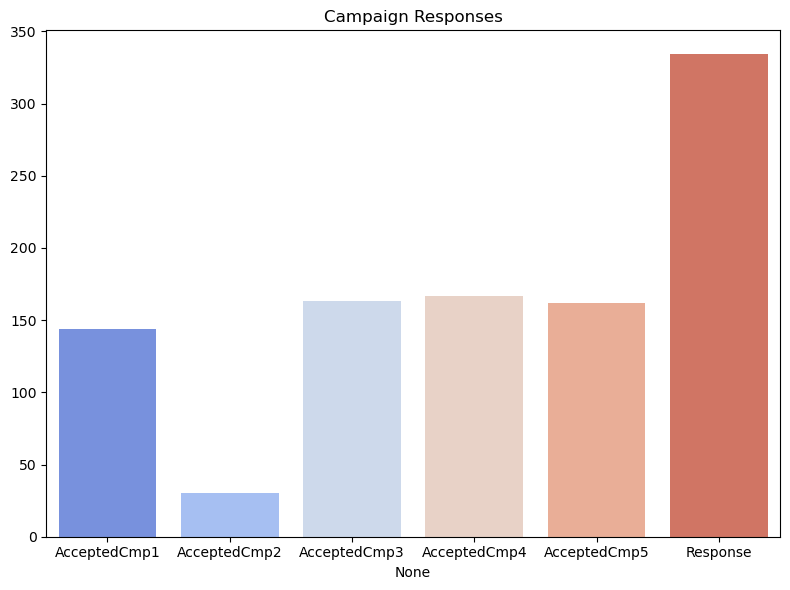

In [125]:
df = df_features


fig, axs = plt.subplots(1, 1, figsize=(8, 6))

campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_sums = df[campaign_cols].sum()
sns.barplot(x=campaign_sums.index, y=campaign_sums.values, palette="coolwarm") # Now sns is defined and can be used
axs.set_title("Campaign Responses")

plt.tight_layout()
plt.show()

In [127]:
display(df.head())
display(df.info())

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalSpend,FamilySize,YearsWithCompany
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,1,68,1617,1,12
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,71,27,3,10
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,60,776,1,11
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,41,53,2,10
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,44,422,2,10


<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2236 non-null   int64         
 1   Education            2236 non-null   object        
 2   Marital_Status       2236 non-null   object        
 3   Income               2236 non-null   float64       
 4   Kidhome              2236 non-null   int64         
 5   Teenhome             2236 non-null   int64         
 6   Dt_Customer          2236 non-null   datetime64[ns]
 7   Recency              2236 non-null   int64         
 8   MntWines             2236 non-null   int64         
 9   MntFruits            2236 non-null   int64         
 10  MntMeatProducts      2236 non-null   int64         
 11  MntFishProducts      2236 non-null   int64         
 12  MntSweetProducts     2236 non-null   int64         
 13  MntGoldProds         2236 non-null   i

None

<Figure size 5000x4000 with 0 Axes>

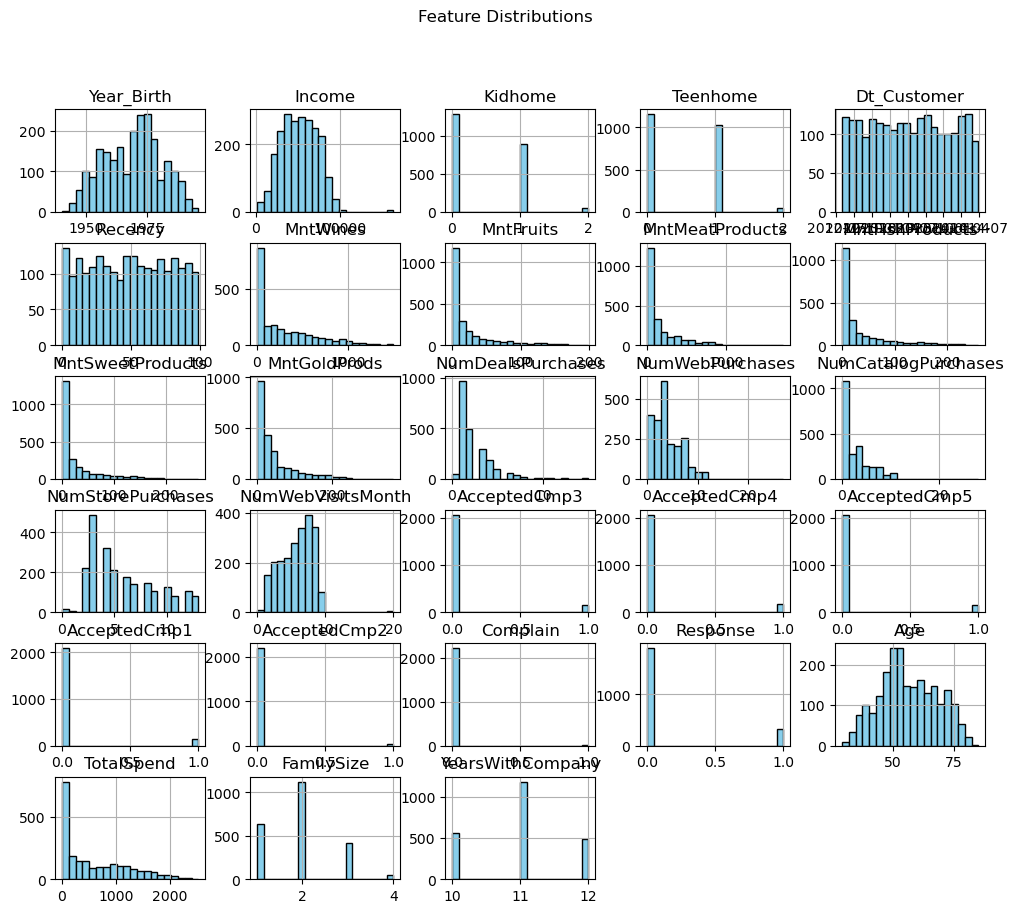

In [131]:
plt.figure(figsize=(50, 40))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

<Figure size 1200x600 with 0 Axes>

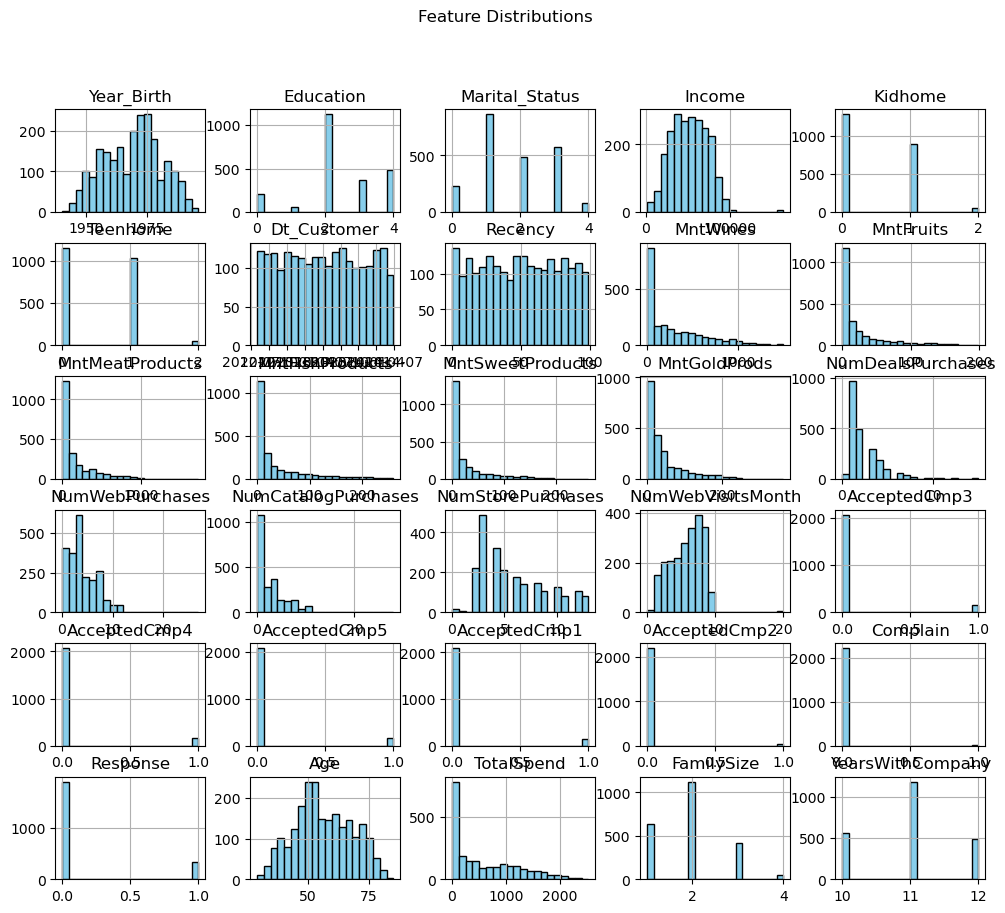

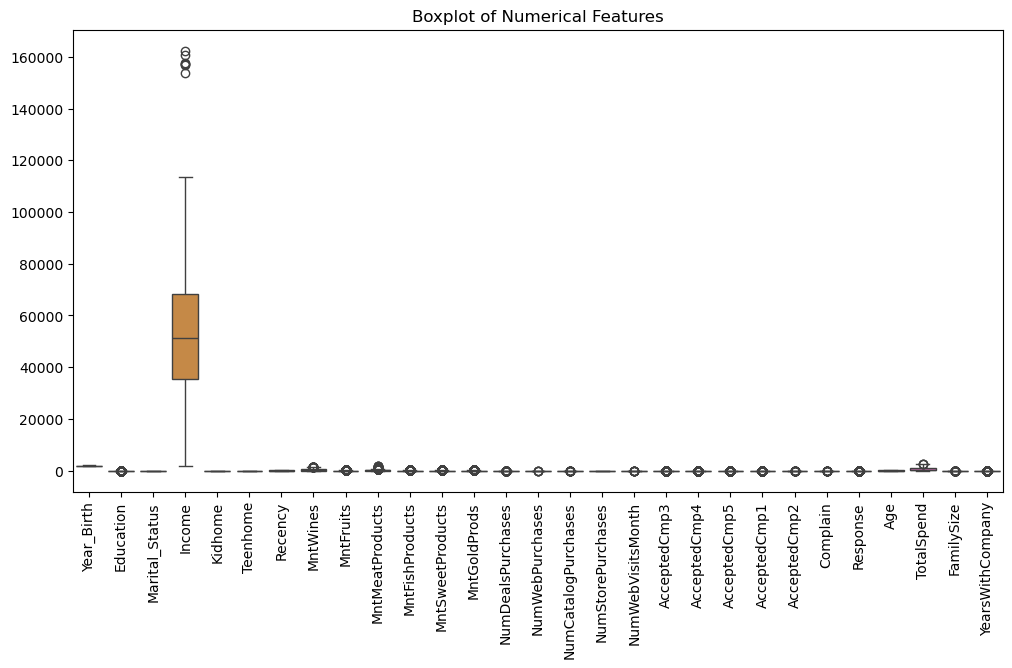

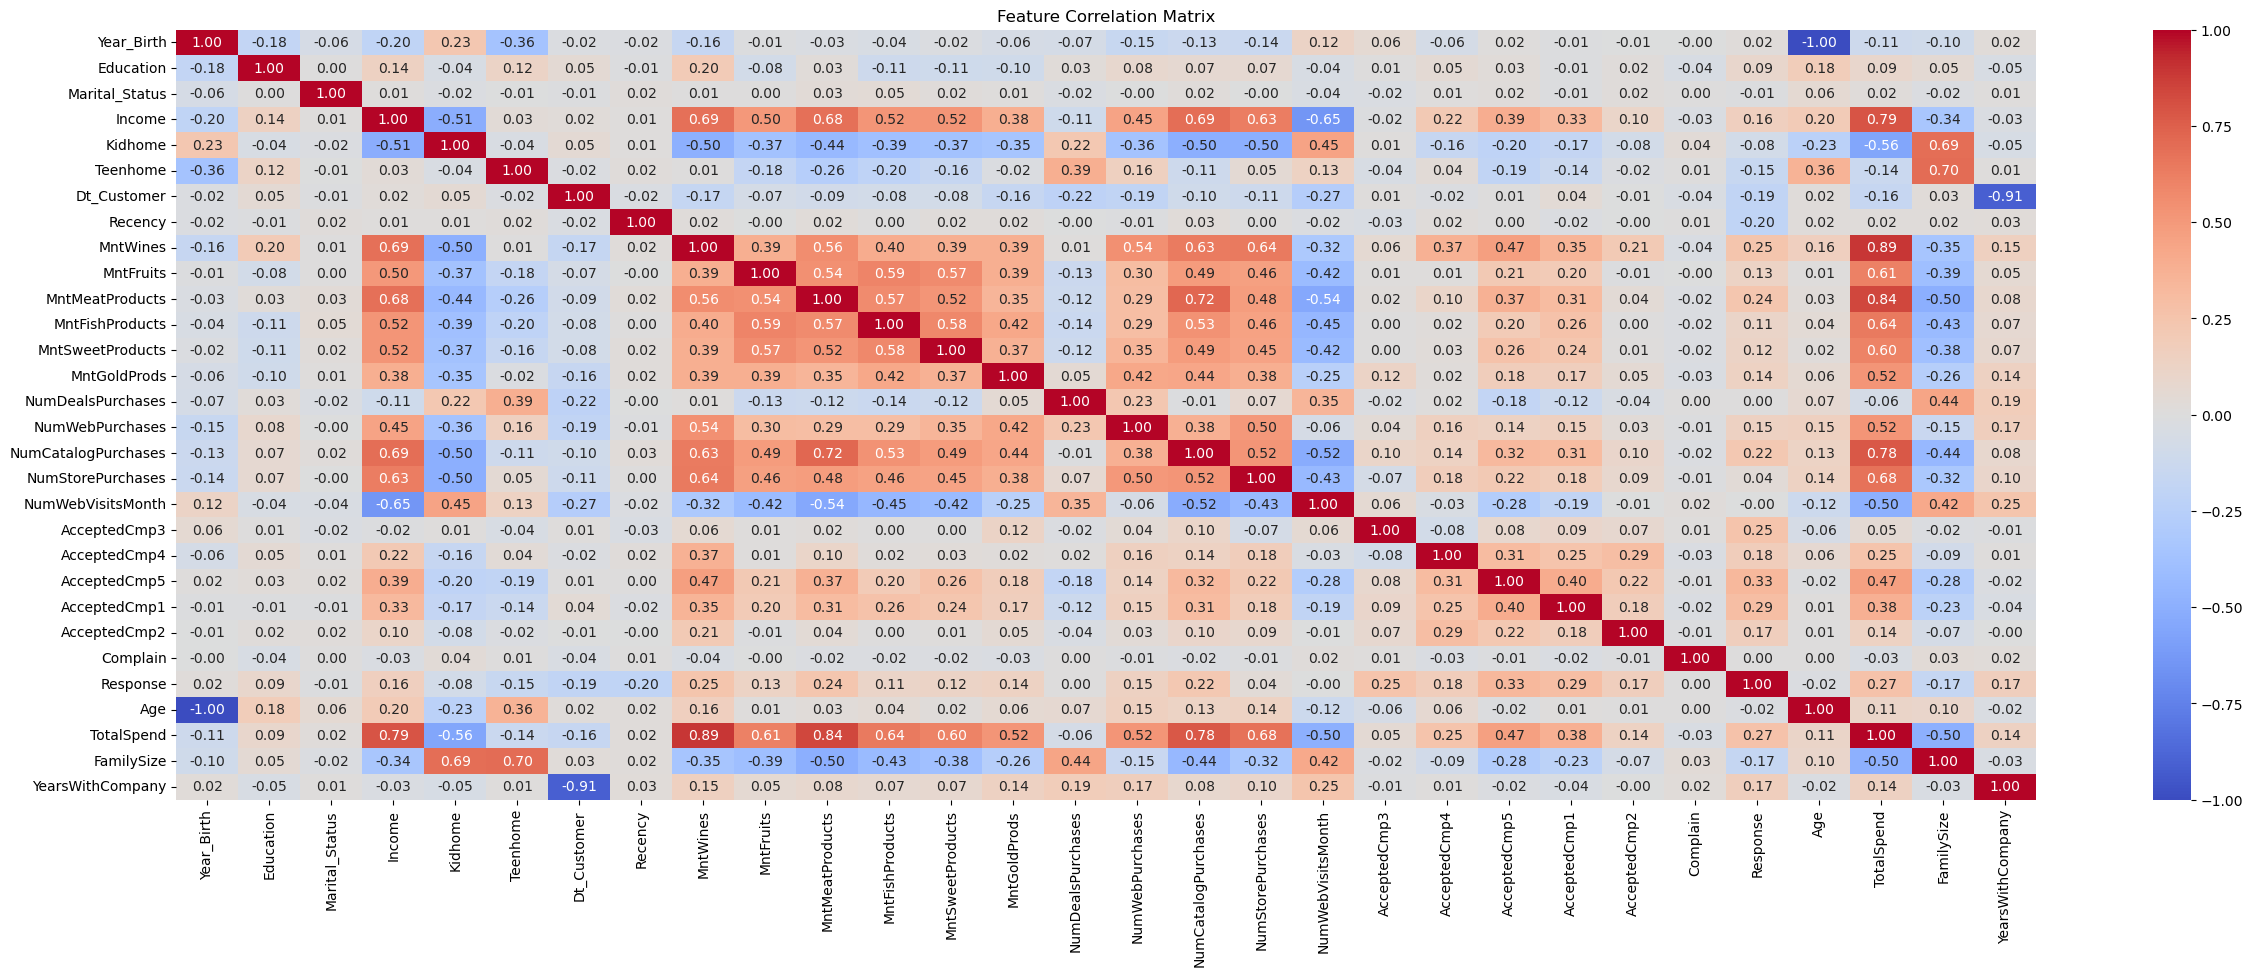

C:\Users\acer\AppData\Local\Temp\ipykernel_15024\3479472011.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


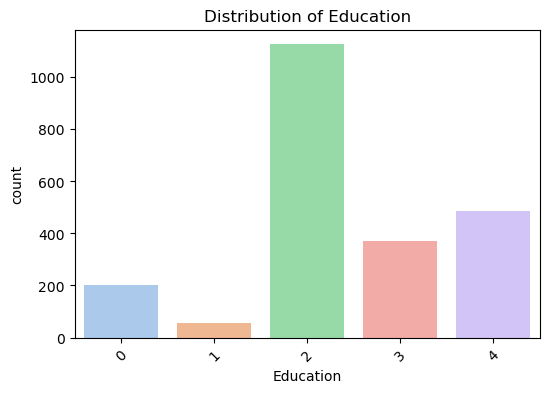

C:\Users\acer\AppData\Local\Temp\ipykernel_15024\3479472011.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


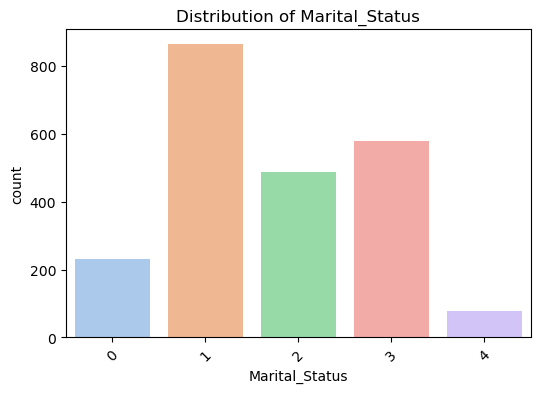

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,TotalSpend,FamilySize,YearsWithCompany
Year_Birth,1.000000,-0.183970,-0.061562,-0.198835,0.233894,-0.363172,-0.016451,-0.019396,-0.162809,-0.013657,...,-0.064261,0.015411,-0.008146,-0.007621,-0.004450,0.018557,-1.000000,-0.113618,-0.095512,0.024991
Education,-0.183970,1.000000,0.004069,0.144024,-0.044827,0.119300,0.052456,-0.010839,0.195600,-0.083850,...,0.052999,0.030661,-0.011246,0.021257,-0.041915,0.090466,0.183970,0.089177,0.054286,-0.046826
Marital_Status,-0.061562,0.004069,1.000000,0.010578,-0.018957,-0.007755,-0.007951,0.018495,0.006597,0.003184,...,0.013413,0.016321,-0.011586,0.018210,0.001402,-0.008601,0.061562,0.021740,-0.019185,0.011409
Income,-0.198835,0.144024,0.010578,1.000000,-0.510443,0.034315,0.023677,0.007828,0.686082,0.504912,...,0.217658,0.394309,0.325253,0.104063,-0.027871,0.161122,0.198835,0.789376,-0.340552,-0.026504
Kidhome,0.233894,-0.044827,-0.018957,-0.510443,1.000000,-0.035339,0.054036,0.007964,-0.496166,-0.372442,...,-0.161686,-0.204918,-0.172435,-0.081760,0.036336,-0.080005,-0.233894,-0.556719,0.690256,-0.053951
Teenhome,-0.363172,0.119300,-0.007755,0.034315,-0.035339,1.000000,-0.017871,0.016746,0.005047,-0.176117,...,0.038680,-0.190383,-0.140426,-0.015715,0.007553,-0.154941,0.363172,-0.138197,0.698721,0.008896
Dt_Customer,-0.016451,0.052456,-0.007951,0.023677,0.054036,-0.017871,1.000000,-0.024238,-0.166068,-0.067104,...,-0.018169,0.005541,0.039843,-0.005958,-0.035685,-0.194232,0.016451,-0.158764,0.025742,-0.910387
Recency,-0.019396,-0.010839,0.018495,0.007828,0.007964,0.016746,-0.024238,1.000000,0.016321,-0.003717,...,0.018779,0.000844,-0.019367,-0.001811,0.005361,-0.198781,0.019396,0.020842,0.017826,0.025544
MntWines,-0.162809,0.195600,0.006597,0.686082,-0.496166,0.005047,-0.166068,0.016321,1.000000,0.388472,...,0.373491,0.471949,0.354328,0.206031,-0.035974,0.247280,0.162809,0.891696,-0.351522,0.153847
MntFruits,-0.013657,-0.083850,0.003184,0.504912,-0.372442,-0.176117,-0.067104,-0.003717,0.388472,1.000000,...,0.010363,0.211996,0.195351,-0.009717,-0.002813,0.125854,0.013657,0.613122,-0.394121,0.054834


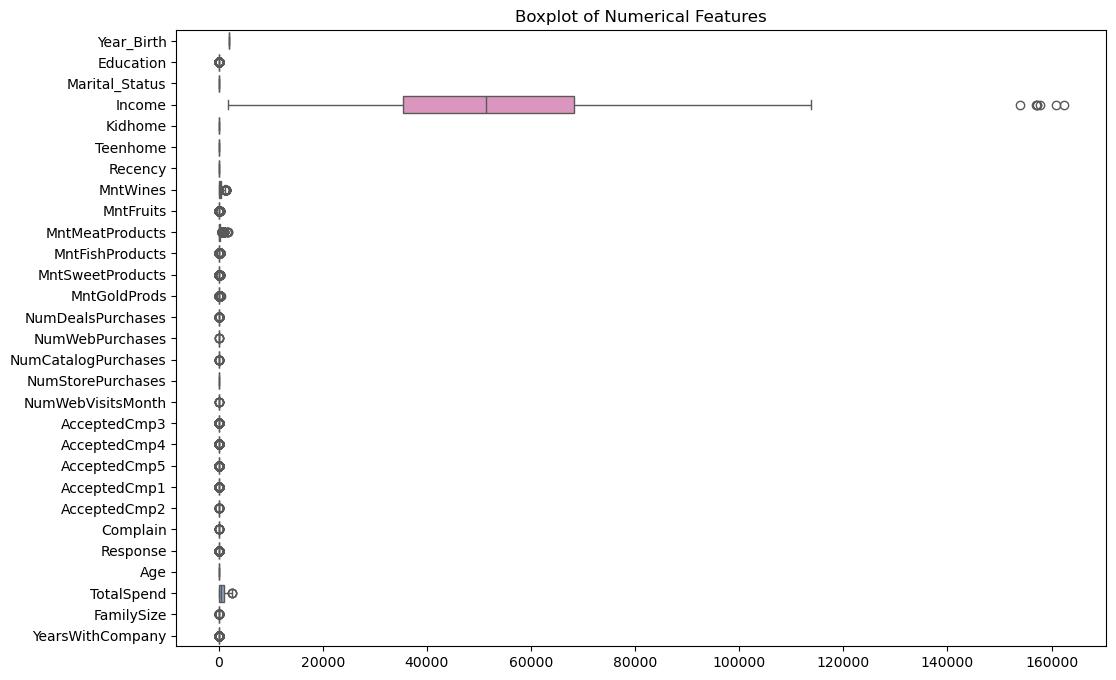

In [139]:
# Convert categorical variables to numeric
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Visualizing the distribution of numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots for numerical features to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

# Countplot for categorical features
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Correlation Matrix
display(df.corr())

# Boxplot for all numerical features to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Boxplot of Numerical Features")
plt.show()


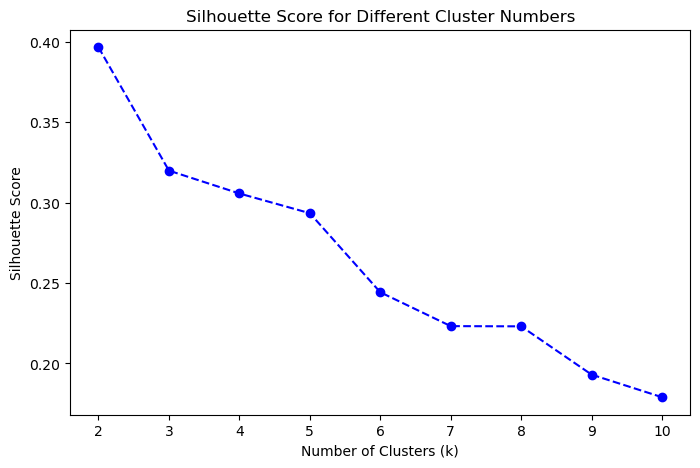

In [141]:
# Compute Silhouette Score for different cluster sizes
silhouette_scores = {}
for k in range(2, 11):  # Testing for k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, labels)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Numbers")
plt.show()

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [159]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

In [161]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [163]:
# Applying KMeans with 3 clusters (since we identified 3 main product categories)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [165]:
# Visualizing the clusters with PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

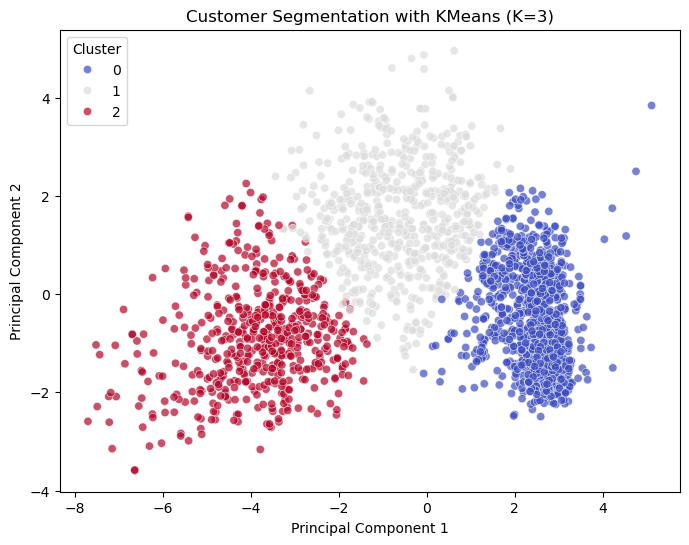

In [167]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='coolwarm', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation with KMeans (K=3)")
plt.legend(title="Cluster")
plt.show()

<Figure size 1200x600 with 0 Axes>

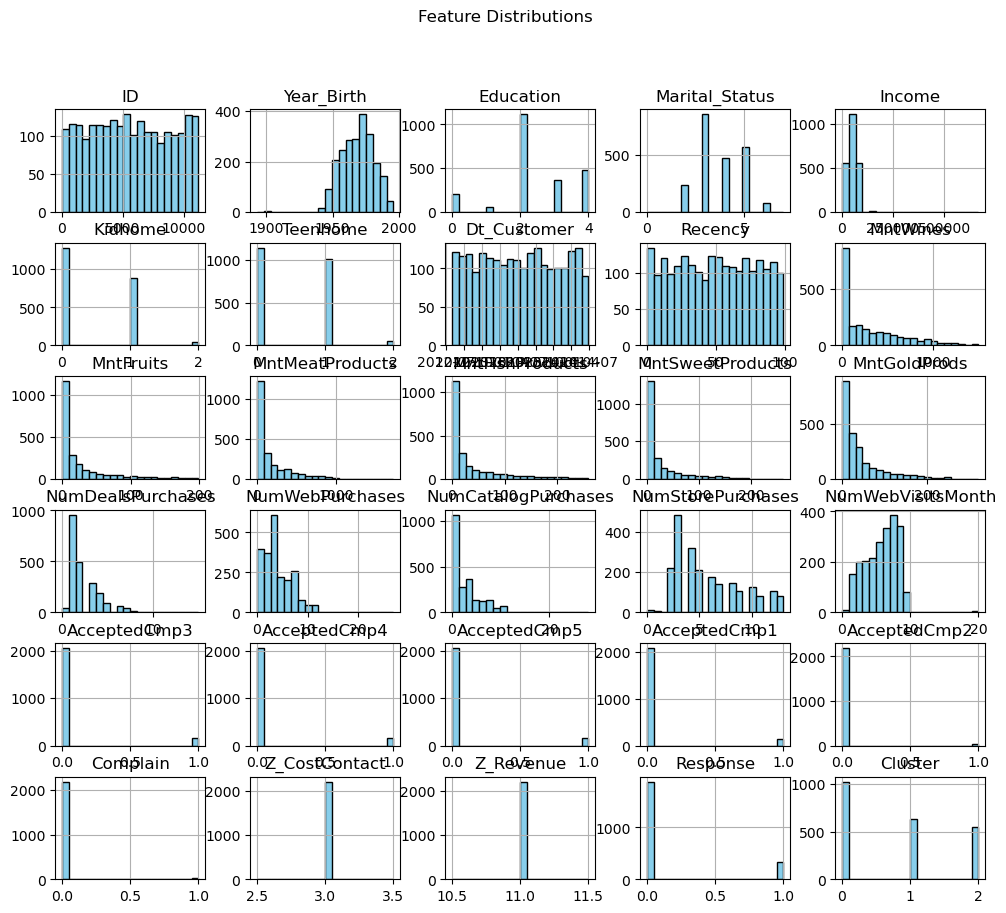

In [169]:
# Visualizing the distribution of numerical features
plt.figure(figsize=(12, 6))
df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

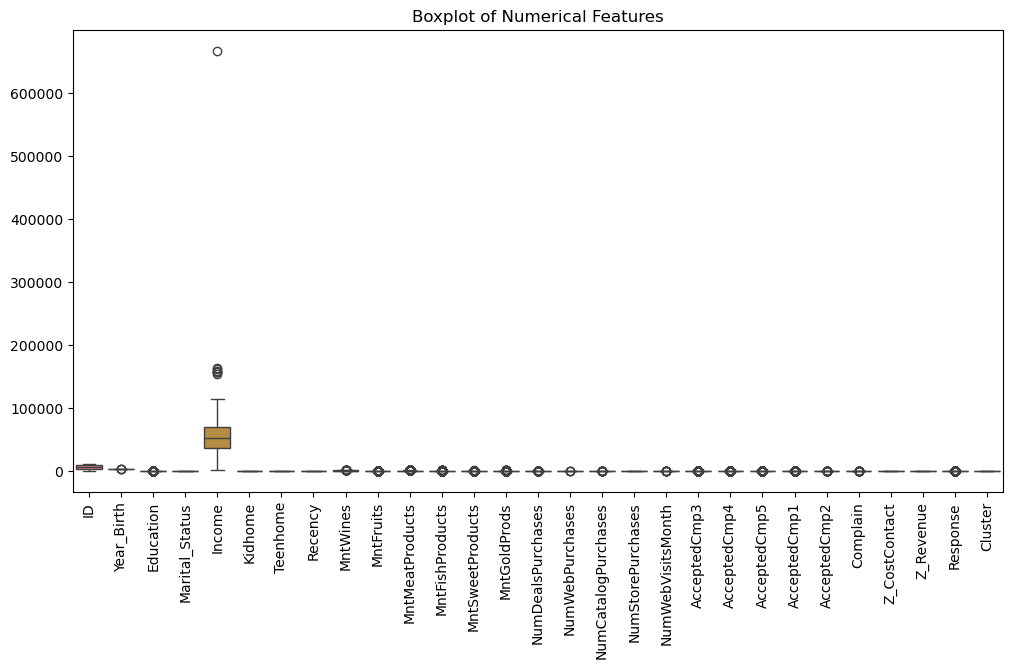

In [171]:
# Boxplots for numerical features to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

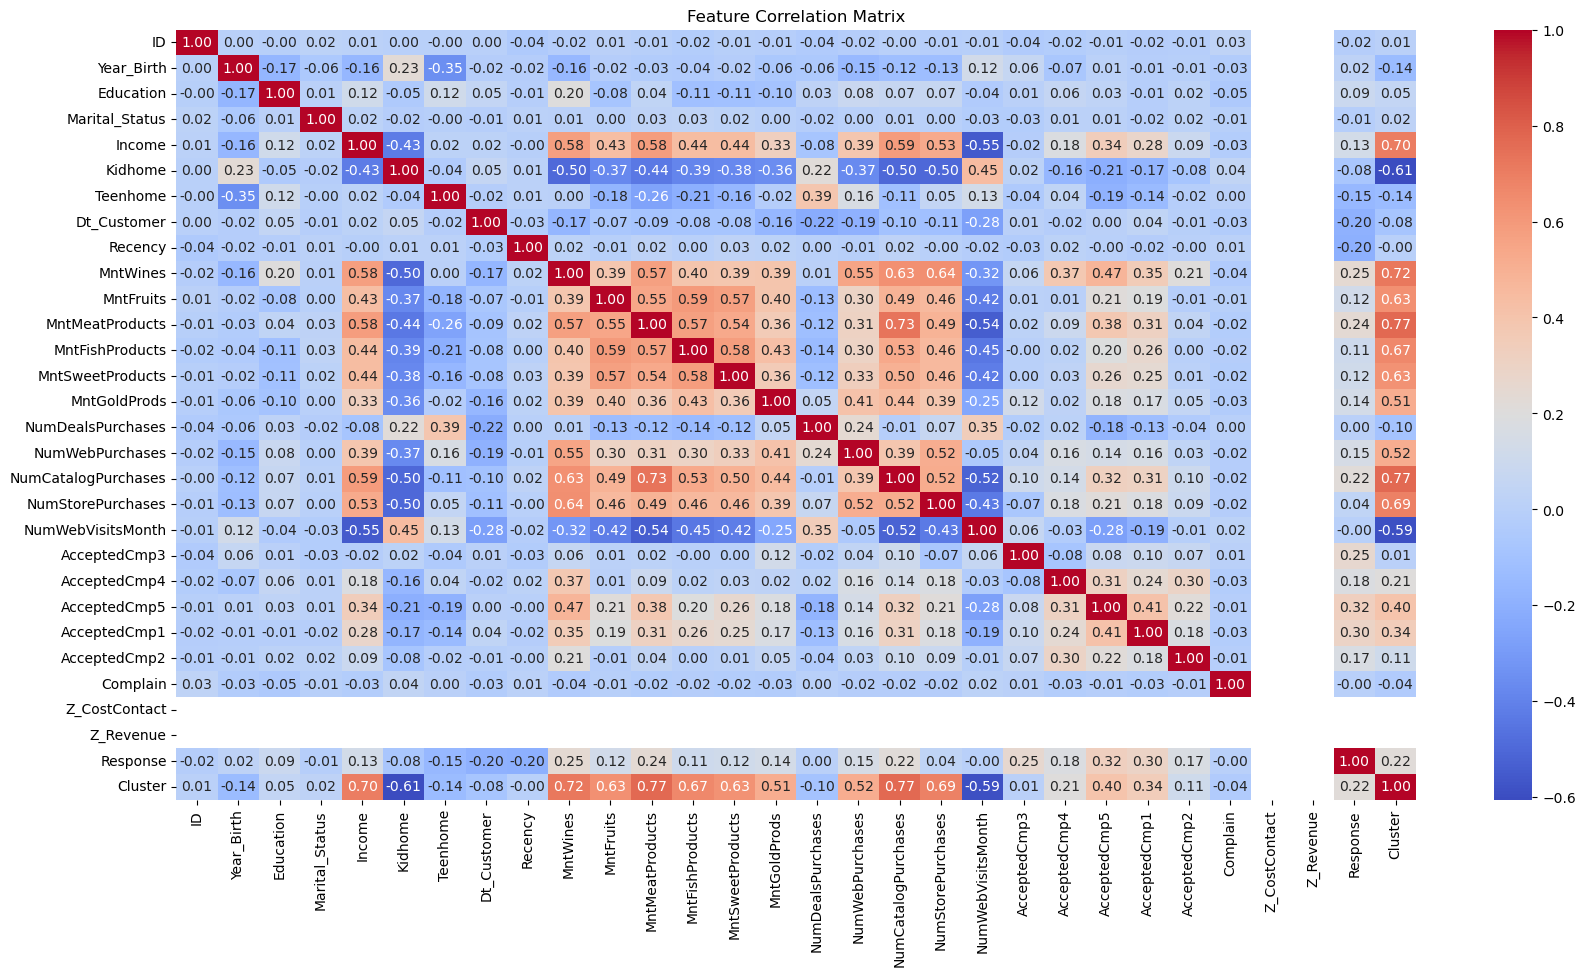

In [173]:
# Correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_15024\258302104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


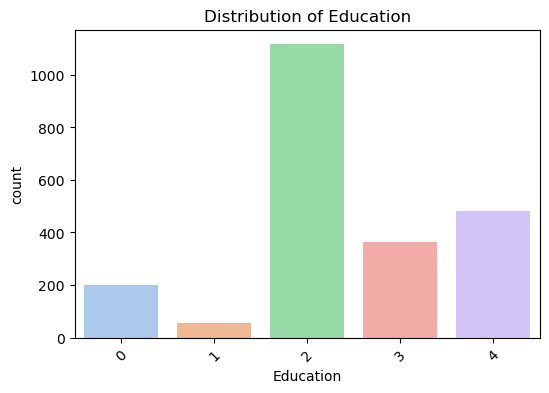

C:\Users\acer\AppData\Local\Temp\ipykernel_15024\258302104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='pastel')


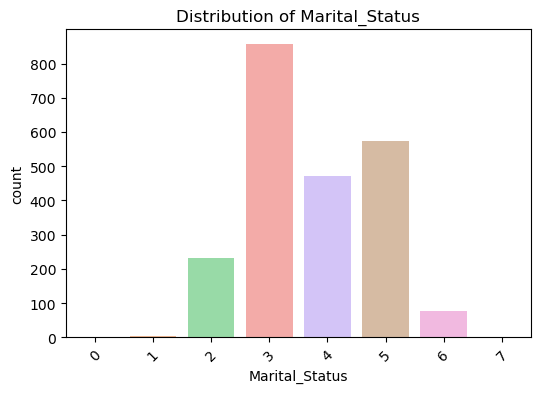

In [179]:
# Countplot for categorical features
categorical_columns = ['Education', 'Marital_Status']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette='pastel')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()